In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
path = '/home/id357/Downloads/experiments/queries-short/output/combination_0/query-times.csv'
df = pd.read_csv(path,sep=";")

In [20]:
df

,name,id,results,time,error,timestamps,httpRequests
0,interactive-short-1,0,1,1132,False,1123,107.0
1,interactive-short-1,1,1,478,False,477,56.0
2,interactive-short-1,2,1,360,False,360,49.0
3,interactive-short-1,3,1,319,False,317,36.0
4,interactive-short-1,4,1,428,False,423,51.0
5,interactive-short-2,0,10,3274,False,3154 3158 3158 3159 3185 3186 3186 3186 3272 3274,6.0
6,interactive-short-2,1,0,67,False,NaN,6.0
7,interactive-short-2,2,1,153,False,152,7.0
8,interactive-short-2,3,0,59,False,NaN,6.0
9,interactive-short-2,4,10,2110,False,2027 2029 2029 2029 2085 2086 2086 2086 2109 2110,6.0


In [21]:
df.sort_values(by=['name'], axis=0, inplace=True)

# set the index to be this and don't drop
df.set_index(keys=['name'], drop=False,inplace=True)

# get a list of names
names=df['name'].unique().tolist()

# now we can perform a lookup on a 'view' of the dataframe
interactive_short_1 = df.loc[df.name=='interactive-short-1']

In [22]:
interactive_short_1

,name,id,results,time,error,timestamps,httpRequests
name,,,,,,,
interactive-short-1,interactive-short-1,0,1,1132,False,1123,107.0
interactive-short-1,interactive-short-1,1,1,478,False,477,56.0
interactive-short-1,interactive-short-1,2,1,360,False,360,49.0
interactive-short-1,interactive-short-1,3,1,319,False,317,36.0
interactive-short-1,interactive-short-1,4,1,428,False,423,51.0


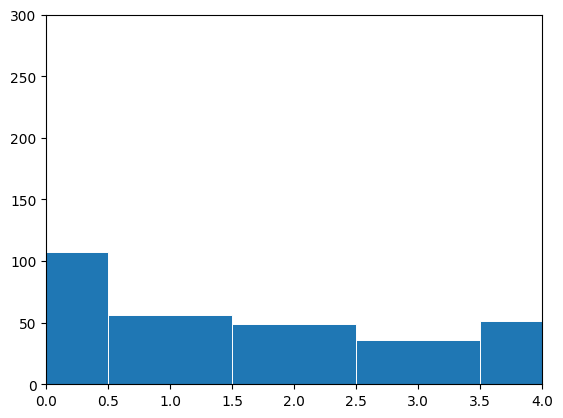

In [30]:
y = interactive_short_1['httpRequests'].to_numpy()
x = interactive_short_1['id'].to_numpy()

fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 4),
       ylim=(0, 300),)
plt.show()